# Cleaning the data and training the model

### Getting started

In [11]:
# Importing the requried libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

### Reading data

In [12]:
# Reading the CSV files
df1 = pd.read_csv(r'C:/Users/wolfr/OneDrive/Desktop/Logeshwaran_WorkSpace/Singapore_Resale_Flat_Prices_Predicting/dataset/ResaleFlatPricesBasedonApprovalDate19901999.csv')
df2 = pd.read_csv(r'C:/Users/wolfr/OneDrive/Desktop/Logeshwaran_WorkSpace/Singapore_Resale_Flat_Prices_Predicting/dataset/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df3 = pd.read_csv(r'C:/Users/wolfr/OneDrive/Desktop/Logeshwaran_WorkSpace/Singapore_Resale_Flat_Prices_Predicting/dataset/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df4 = pd.read_csv(r'C:/Users/wolfr/OneDrive/Desktop/Logeshwaran_WorkSpace/Singapore_Resale_Flat_Prices_Predicting/dataset/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df5 = pd.read_csv(r'C:/Users/wolfr/OneDrive/Desktop/Logeshwaran_WorkSpace/Singapore_Resale_Flat_Prices_Predicting/dataset/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')


In [13]:
# Shape of each dataframes
dfs=[df1,df2,df3,df4,df5]
for i in dfs:
    print(i.shape)

(287196, 10)
(369651, 10)
(52203, 10)
(37153, 11)
(178408, 11)


In [14]:
# Concating all dataframes to a single dataframe
df=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)

### Understanding the data and cleaning

In [15]:
# Displaying the data
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [16]:
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
924606,2024-03,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,855000.0,62 years 08 months
924607,2024-04,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,900000.0,62 years 10 months
924608,2024-04,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,62 years 10 months
924609,2024-02,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,62 years 11 months
924610,2024-03,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,1200000.0,62 years 09 months


In [17]:
# Shape of the data
df.shape

(924611, 11)

In [18]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924611 entries, 0 to 924610
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                924611 non-null  object 
 1   town                 924611 non-null  object 
 2   flat_type            924611 non-null  object 
 3   block                924611 non-null  object 
 4   street_name          924611 non-null  object 
 5   storey_range         924611 non-null  object 
 6   floor_area_sqm       924611 non-null  float64
 7   flat_model           924611 non-null  object 
 8   lease_commence_date  924611 non-null  int64  
 9   resale_price         924611 non-null  float64
 10  remaining_lease      215561 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.6+ MB


In [19]:
# Unique values in each column
for col in df.columns[0:]:
    print(col, ': ', (df[col].nunique()), 'labels')

month :  413 labels
town :  27 labels
flat_type :  8 labels
block :  2708 labels
street_name :  584 labels
storey_range :  25 labels
floor_area_sqm :  211 labels
flat_model :  34 labels
lease_commence_date :  56 labels
resale_price :  9474 labels
remaining_lease :  724 labels


In [20]:
# Null values
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

Droping the 'remaining_lease' column as majority of the rows lacks this value(data is available only from 2015)

In [21]:
# Droping the column as mojority of the data is null
df = df.drop(columns='remaining_lease')

In [22]:
# After droping the column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

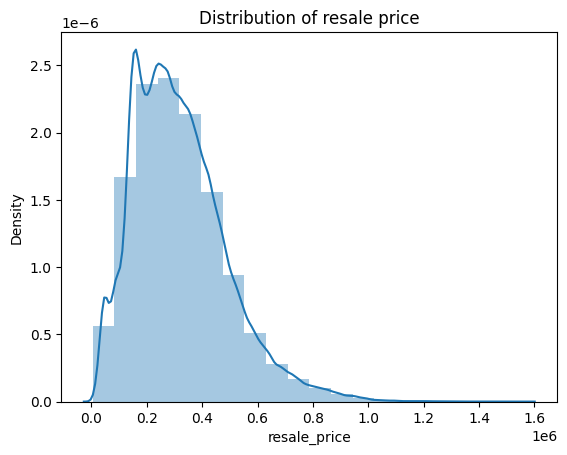

In [23]:
# Visualize the distribution of the resale price column
sns.distplot(df['resale_price'], bins = 20)
plt.title('Distribution of resale price')
plt.show()

### Dealing with Features

#### flat_type column
Collapsing flat type categories

In [24]:
df['flat_type'].value_counts()

flat_type
4 ROOM              351298
3 ROOM              295325
5 ROOM              194877
EXECUTIVE            69497
2 ROOM               11768
1 ROOM                1303
MULTI GENERATION       279
MULTI-GENERATION       264
Name: count, dtype: int64

In [25]:
# Unique lables in flat_type column
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [26]:
# Collapsing the flat_type categories
mapping={'MULTI-GENERATION':'MULTI GENERATION'}

df['flat_type'] = df['flat_type'].replace(mapping)
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

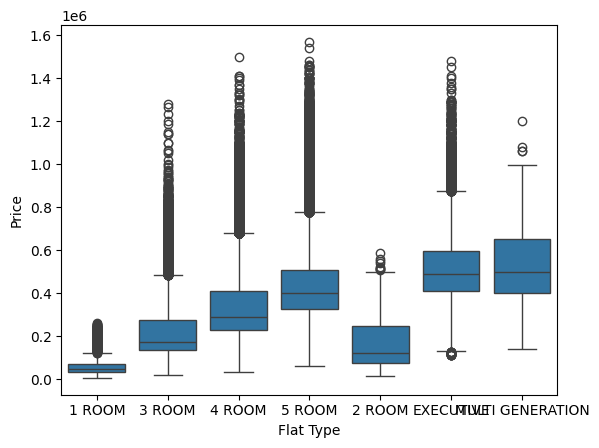

In [27]:
# Visualize relationship between price and flat_type
sns.boxplot(x = df['flat_type'], y = df['resale_price'])
plt.xlabel('Flat Type')
plt.ylabel('Price')
plt.show()

Encoding the flat type categories

In [28]:
# Assigning the value-pairs to be replaced
cat = {'1 ROOM': 1,
       '2 ROOM':2,
       '3 ROOM':3,
       '4 ROOM':4,
       '5 ROOM':5,
       'EXECUTIVE':6,
       'MULTI GENERATION':7}

# Replacing the values in df
df['flat_type'] = df['flat_type'].replace(cat)
df['flat_type'].value_counts()

flat_type
4    351298
3    295325
5    194877
6     69497
2     11768
1      1303
7       543
Name: count, dtype: int64

Dealing with collapsed flat model categories

#### flat_model column

In [29]:
# Flat_model column
print(df['flat_model'].nunique())
df['flat_model'].unique()

34


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [30]:
# Deal with capitalized value
df['flat_model'] = df['flat_model'].str.lower()

In [31]:
# Number of unique lables in flat model after dealing with capitalized values
df['flat_model'].nunique()

21

In [32]:
# Altered flat_model column
df['flat_model'].value_counts()

flat_model
model a                   264133
improved                  241230
new generation            188686
simplified                 57462
premium apartment          46554
standard                   42481
apartment                  35389
maisonette                 29603
model a2                   10115
dbss                        3281
model a-maisonette          2073
adjoined flat               1245
terrace                      692
multi generation             543
type s1                      434
type s2                      216
2-room                       127
improved-maisonette          125
premium apartment loft       108
premium maisonette            86
3gen                          28
Name: count, dtype: int64

In [33]:
# Encoding flat_model column
le = preprocessing.LabelEncoder()

flat_modelcode= le.fit_transform(df['flat_model'])
df.insert(loc = 8,
          column = 'flat_modelcode',
          value = flat_modelcode)

In [34]:
df['flat_modelcode'].value_counts()

flat_modelcode
8     264133
5     241230
12    188686
16     57462
13     46554
17     42481
3      35389
7      29603
10     10115
4       3281
9       2073
2       1245
18       692
11       543
19       434
20       216
0        127
6        125
14       108
15        86
1         28
Name: count, dtype: int64

#### Other features preparation

In [35]:
# Town column 
df['town'].nunique()

27

In [36]:
df['town'].value_counts()

town
TAMPINES           79782
YISHUN             69913
JURONG WEST        66531
BEDOK              66526
WOODLANDS          65376
ANG MO KIO         51977
HOUGANG            50611
BUKIT BATOK        44253
CHOA CHU KANG      38190
BUKIT MERAH        34267
PASIR RIS          33150
SENGKANG           32296
TOA PAYOH          31463
QUEENSTOWN         28711
GEYLANG            28114
CLEMENTI           27986
BUKIT PANJANG      27623
KALLANG/WHAMPOA    27101
JURONG EAST        24728
SERANGOON          22788
BISHAN             21229
PUNGGOL            20483
SEMBAWANG          13779
MARINE PARADE       8022
CENTRAL AREA        7134
BUKIT TIMAH         2514
LIM CHU KANG          64
Name: count, dtype: int64

In [37]:
# Creating a column with encoded value
town_code = le.fit_transform(df['town'])
df.insert(loc = 2,
          column = 'town_code',
          value = town_code)

In [38]:
# Encoded value count
df['town_code'].value_counts()

town_code
23    79782
26    69913
13    66531
1     66526
25    65376
0     51977
11    50611
3     44253
8     38190
4     34267
17    33150
21    32296
24    31463
19    28711
10    28114
9     27986
5     27623
14    27101
12    24728
22    22788
2     21229
18    20483
20    13779
16     8022
7      7134
6      2514
15       64
Name: count, dtype: int64

#### Dividing the columns

In [39]:
# Print header of column
df['storey_range'].head()

0    10 TO 12
1    04 TO 06
2    10 TO 12
3    07 TO 09
4    04 TO 06
Name: storey_range, dtype: object

In [40]:
# Splitting storey range column
storey=df['storey_range'].str.split(' TO ',expand = True)
storey.head()

,0,1
0,10,12
1,04,06
2,10,12
3,07,09
4,04,06


In [41]:
# Creating the storey minimum values as column
df.insert(loc = 6,
          column = 'storey_min',
          value = storey[0])

In [42]:
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = storey[1])

In [43]:
# Splitting month column
month=df['month'].str.split('-',expand = True)
month.head()

,0,1
0,1990,01
1,1990,01
2,1990,01
3,1990,01
4,1990,01


In [44]:
# Creating the year values as column
df.insert(loc = 1,
          column = 'selling_year',
          value = month[0])

In [45]:
# Creating the storey maximum values as column
df.insert(loc = 2,
          column = 'selling_month',
          value = month[1])

In [46]:
df.head()

,month,selling_year,selling_month,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,1990-01,1990,01,ANG MO KIO,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0


In [47]:
import os

directory = 'dataset'

# Check if the directory exists
if not os.path.exists(directory):
    # Create the directory if it doesn't exist
    os.makedirs(directory)

# Now, you can save the file in the 'dataset' directory
df.to_csv(os.path.join(directory, 'Pricedata.csv'), index=False)


In [48]:
df.to_csv('dataset\Pricedata.csv', index=False)

#### Dealing with datatypes

In [49]:
# Datatyppe of the columns
df.dtypes

month                   object
selling_year            object
selling_month           object
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

In [50]:
# Changing the datatype of numeric columns
df[['selling_year','selling_month','storey_min','storey_max']] = df[['selling_year','selling_month','storey_min','storey_max']].astype('int')

In [51]:
df.dtypes

month                   object
selling_year             int32
selling_month            int32
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min               int32
storey_max               int32
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

<Axes: >

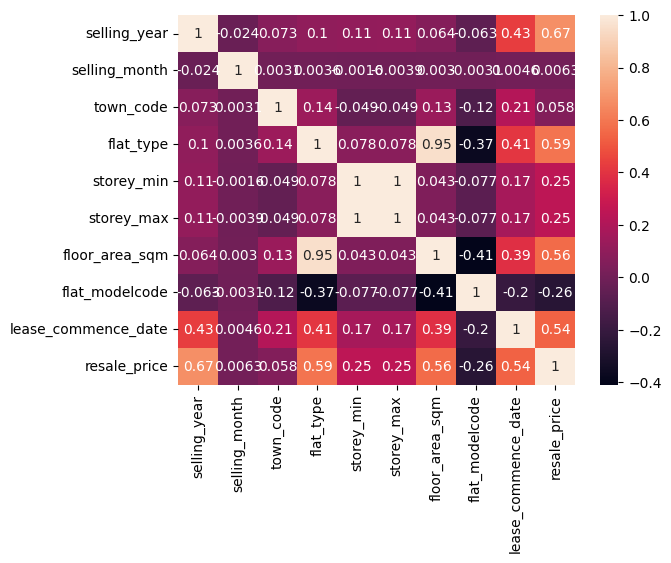

In [52]:
# Correlation for the feature
corr_df = df[['selling_year','selling_month','town_code','flat_type','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date','resale_price']].dropna().corr()
sns.heatmap(corr_df, annot = True)

### Training the model

In [53]:
# Assigning the data
X = df[['selling_year','selling_month','town_code','flat_type','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date']]
y = df['resale_price']

In [54]:
X

,selling_year,selling_month,town_code,flat_type,storey_min,storey_max,floor_area_sqm,flat_modelcode,lease_commence_date
0,1990,1,0,1,10,12,31.0,5,1977
1,1990,1,0,1,4,6,31.0,5,1977
2,1990,1,0,1,10,12,31.0,5,1977
3,1990,1,0,1,7,9,31.0,5,1977
4,1990,1,0,3,4,6,73.0,12,1976
...,...,...,...,...,...,...,...,...,...
924606,2024,3,26,6,7,9,142.0,3,1987
924607,2024,4,26,6,4,6,146.0,7,1988
924608,2024,4,26,6,4,6,142.0,3,1988
924609,2024,2,26,7,4,6,164.0,11,1987


In [55]:
# Splitting the data
# Importing the split
from sklearn.model_selection import train_test_split

# Objecting the split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#### Linear Regression

In [56]:
# Create a regressor
from sklearn.linear_model import LinearRegression

# Create a regressor object
lin_reg = LinearRegression()

# fit the model with X-train and y_train data
lin_reg.fit(X_train,y_train)

LinearRegression()

In [57]:
# Accuracy score of the model
score = lin_reg.score(X_test,y_test)
print(score * 100,"%")

76.23028797955156 %


#### Decision Tree Regressor

In [58]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
Dt_reg = DecisionTreeRegressor(random_state = 0)  
  
# fit the model with X-train and y_train data 
Dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [59]:
# Accuracy of the model
score = Dt_reg.score(X_test,y_test)
print(score * 100,"%")

96.05270371838893 %


#### Random Forest Regressor

In [60]:
# import joblib

# with open("resale_rfr.pkl", "wb") as files:
#     joblib.dump(rf_reg, files)


In [61]:
# Create a regressor
from sklearn.ensemble import RandomForestRegressor

# Create a regressor object
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model with X-train and y_train data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [62]:
# Accuracy of the model
score = rf_reg.score(X_test,y_test)
print(score * 100,"%")

97.6666217149988 %


Pickling the random forest trained knowledge to build streamlit ML model web page

In [63]:
# Pickling the trained model
# Importing the pickle package
import pickle

with open("resale_rfr.pkl","wb") as files:
  pickle.dump(rf_reg, files)

In [64]:
with open('resale_rfr.pkl', 'rb') as file:
    loaded_model = pickle.load(file)



In [65]:
sample_data = ([[2019,12,0,1,10,12,115,5,2000]])
prediction = loaded_model.predict(sample_data)

# Display the prediction
print("Prediction:", prediction)

Prediction: [556860.]


In [66]:
sample_data1 = ([[2019,1,1,2,10,12,'115.0',2,2000]])
predict = rf_reg.predict(sample_data1)

# Display the prediction
print("Prediction:", predict)

Prediction: [531448.]


In [67]:
sample_data1 = ([[2024,1,26,6,4,6,146.0,5,1988]])
dtpredict = Dt_reg.predict(sample_data1)

# Display the prediction
print("Prediction:", dtpredict)

Prediction: [830000.]
